# RBM-GG 

Gaussian - Gaussian

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

In [2]:
data_dir = '../../../paperstudy/RBM/datas/'

In [3]:
sys.path.append('../')
import RBM as rbm

## Load data

In [4]:
mnist_train_data = data_dir + "mnist_train.csv"
mnist_test_data = data_dir + "mnist_test.csv"

training_data_file = open(mnist_train_data, 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

test_data_file = open(mnist_test_data, 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [5]:
# number of data
print('number of training data', len(training_data_list))
print('number of test data', len(test_data_list))

number of training data 60000
number of test data 10000


## Preprocessing

In [11]:
n_data_train = 10000
n_data_val = 500
n_data_test = 500

n_x = 784 # input vector size

x_train = np.zeros((n_data_train, n_x))
for i, data in enumerate(training_data_list[:n_data_train]):
    data = data.split(',')
    x_train[i] = np.asfarray(data[1:])/255.
    
x_val = np.zeros((n_data_val, n_x))
for i, data in enumerate(training_data_list[n_data_train:n_data_train+n_data_val]):
    data = data.split(',')
    x_val[i] = np.asfarray(data[1:])/255.
    
x_test = np.zeros((n_data_test, n_x))
for i, data in enumerate(test_data_list[:n_data_test]):
    data = data.split(',')
    x_test[i] = np.asfarray(data[1:])/255.

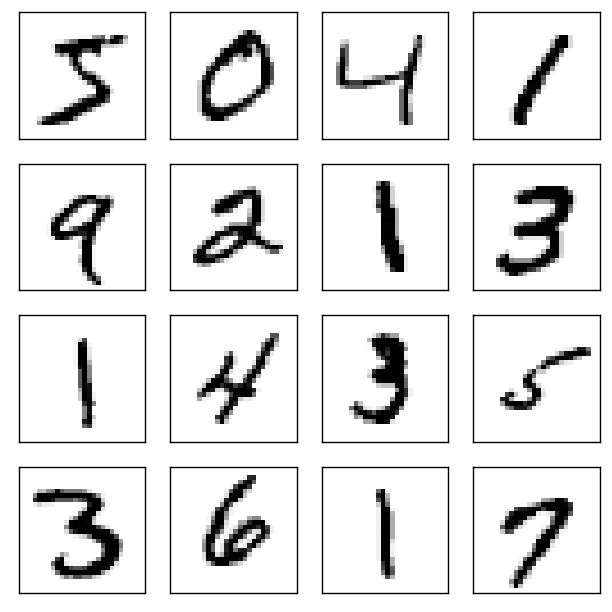

In [12]:
f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(x_train[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

## Define RBM

In [31]:
model = rbm.GGRBM(n_x,10,0.0001,0.0001)
model.fit(x_train,0.0001,200)

0 0.11248877970126774
1 0.11248876215746646
2 0.1124887979579672
3 0.1124887434498067
4 0.11248876920307106
5 0.11248877752806473
6 0.11248877844894314
7 0.1124887490285173
8 0.11248878461012508
9 0.1124887502838176
10 0.11248873164360113
11 0.11248872061078331
12 0.11248876572711512
13 0.11248879434053852
14 0.1124887572045892
15 0.11248879912791415
16 0.11248878320792939
17 0.11248872117587476
18 0.11248876373098589
19 0.11248879953614849
20 0.1124888081339854
21 0.11248876411993244
22 0.11248875357770716
23 0.11248878874518128
24 0.1124887896511695
25 0.11248874351940409
26 0.11248876028405237
27 0.11248875400839467
28 0.11248882328057917
29 0.11248878555017383
30 0.11248878051647127
31 0.11248877219210705
32 0.11248876500972516
33 0.11248873884056183
34 0.1124887661466411
35 0.11248873828676499
36 0.11248875824494728
37 0.11248877445390178
38 0.1124887567619257
39 0.11248874101360336
40 0.11248876273804054
41 0.11248874516344835
42 0.11248876456523228
43 0.11248875825144604
44 0.11

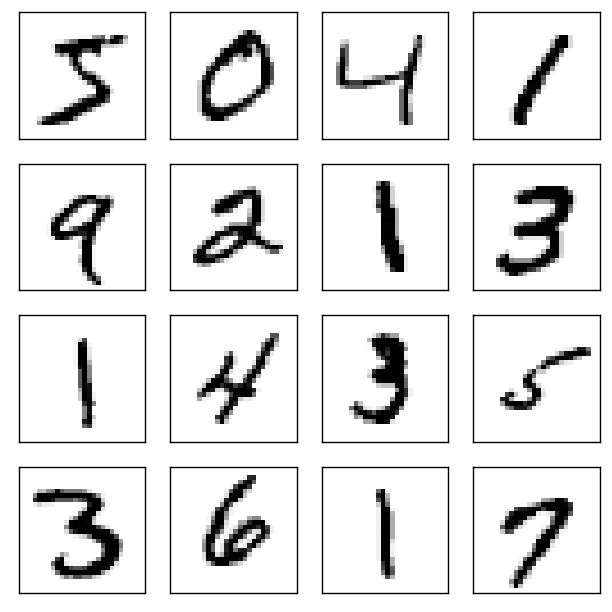

In [32]:
f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(x_train[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

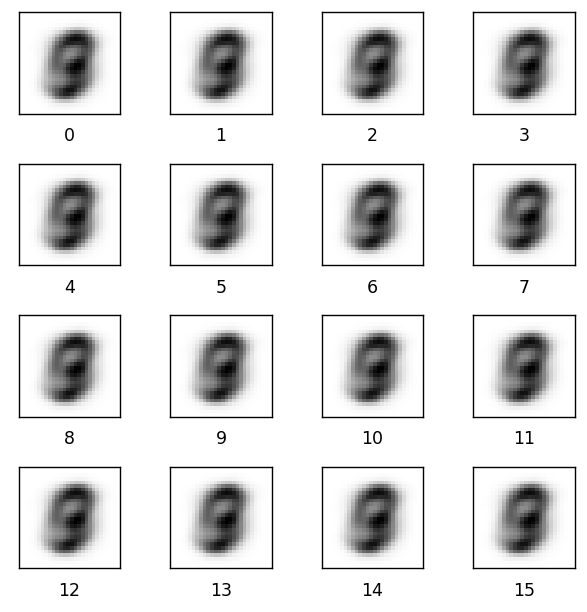

In [33]:
pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
#         ax[i,j].imshow(pred[ind].reshape(28,28), vmin=-1, vmax=1, cmap='Greys')
        ax[i,j].imshow(pred[ind].reshape(28,28), cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

In [34]:
np.max(pred)

0.500269427223895

In [35]:
np.min(pred)

0.4975027633186331

In [36]:
model.w.T[0].shape

(784,)

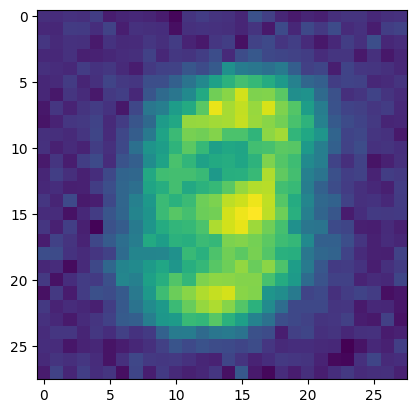

In [37]:
plt.imshow((hid[6]@model.w.T + model.a).reshape(28,28))

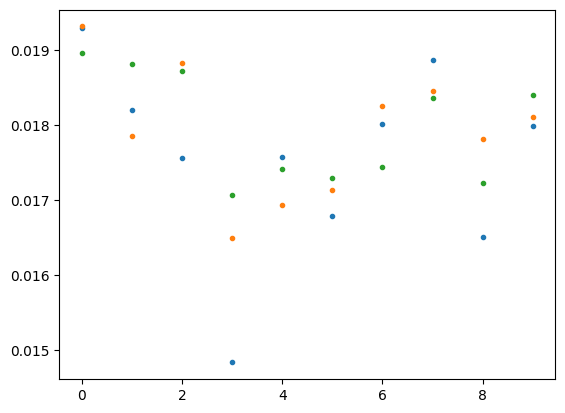

In [38]:
x = np.arange(10)
# plt.hist(hid[8])
plt.plot(x,hid[6],'.')
plt.plot(x,hid[8],'.')
plt.plot(x,hid[14],'.')

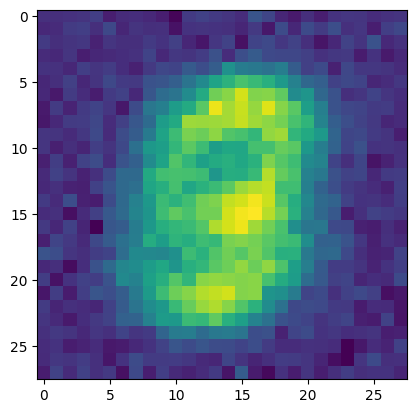

In [39]:
plt.imshow((hid[5]@model.w.T + model.a).reshape(28,28))

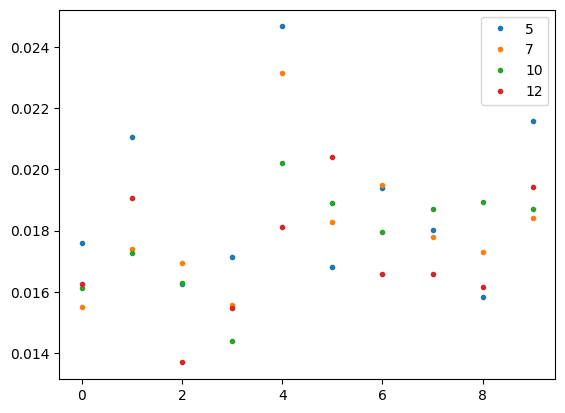

In [40]:
x = np.arange(10)
plt.plot(x,hid[5],'.',label='5')
plt.plot(x,hid[7],'.',label='7')
plt.plot(x,hid[10],'.',label='10')
plt.plot(x,hid[12],'.',label='12')
plt.legend()

In [41]:
model.w.shape

(784, 10)

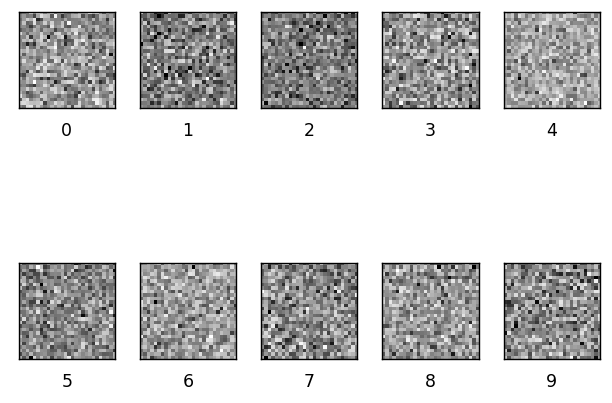

In [42]:
# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

In [28]:
np.log(784)

6.664409020350408

In [29]:
hid[0]

array([0.01816341, 0.01587294, 0.01913158, 0.01655444, 0.01950541,
       0.01891772, 0.0181792 , 0.01731674, 0.01687757, 0.01842094])

In [30]:
model.w

array([[-0.00122335,  0.00327326,  0.00553814, ..., -0.01104507,
        -0.00624095,  0.00186853],
       [ 0.0047749 ,  0.00592757, -0.0102672 , ..., -0.01034307,
         0.01720953,  0.00493674],
       [-0.00943156,  0.00173858,  0.01667612, ..., -0.00260855,
         0.01161544,  0.00440208],
       ...,
       [ 0.01108642, -0.0026456 , -0.00793094, ...,  0.00583928,
         0.00652346, -0.00487152],
       [-0.01942301, -0.00208438, -0.00712039, ...,  0.01280936,
        -0.01282988,  0.01226804],
       [-0.00184428, -0.00831276, -0.00507001, ..., -0.01097957,
         0.00709018, -0.00653937]])

# Feature retrieving

0 0.11248879658633841
1 0.11248875073797705
2 0.11248877259593099
3 0.11248878995319346
4 0.11248876798551548


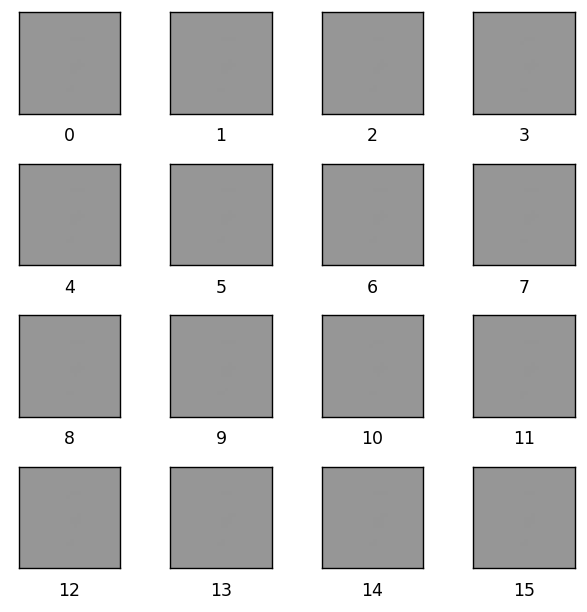

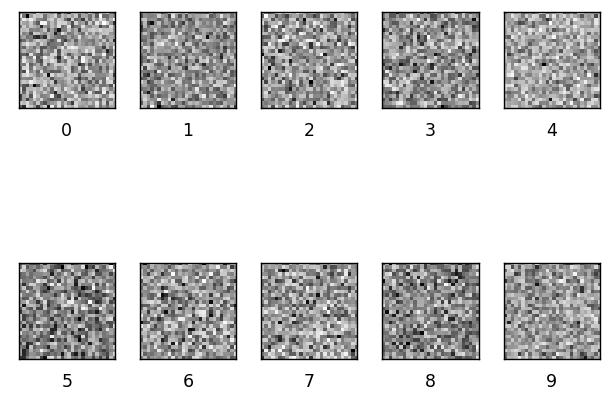

In [43]:
# Not trained

model = rbm.GGRBM(n_x,10,0.0001,0.0001)
model.fit(x_train,0.0001,5)

pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(pred[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

0 0.11248871710529086
1 0.11248878518341075
2 0.11248873464759876
3 0.11248878482907683
4 0.11248877663828423
5 0.11248876281758576
6 0.11248872069305858
7 0.11248874393894426
8 0.11248875087221763
9 0.11248879260216273
10 0.11248871057076673
11 0.11248878890754216
12 0.11248878502705073
13 0.11248878938934355
14 0.11248875603368785
15 0.11248875558930588
16 0.1124887694315781
17 0.11248879837321031
18 0.1124887729509462
19 0.11248872871906118
20 0.11248876490131456
21 0.11248874969902978
22 0.1124887697799085
23 0.11248878404549
24 0.11248876586211645
25 0.11248879520858722
26 0.11248873894605073
27 0.1124887797914418
28 0.11248877929361509
29 0.11248871766995774
30 0.11248880492614996
31 0.1124887049893575
32 0.11248872650389358
33 0.11248875921782091
34 0.11248872595308636
35 0.11248879667714447
36 0.11248877881361444
37 0.1124887409865605
38 0.11248877868853822
39 0.11248875024929993
40 0.11248878882258692
41 0.11248875992074014
42 0.11248876103744278
43 0.11248877567629748
44 0.11

348 0.11248871847255788
349 0.11248877557719253
350 0.11248879342408628
351 0.11248876536197902
352 0.11248873590037331
353 0.11248875766460277
354 0.11248880118017526
355 0.11248876546720094
356 0.11248877305204884
357 0.11248872892818114
358 0.1124887686071736
359 0.11248873007619933
360 0.11248876205711122
361 0.11248880486182117
362 0.11248880744807363
363 0.11248880232139012
364 0.11248873520936348
365 0.11248878184158093
366 0.11248876583558867
367 0.11248873447422583
368 0.11248876810535252
369 0.11248874674105898
370 0.11248877782237242
371 0.11248877731497832
372 0.11248876619509335
373 0.11248874811412388
374 0.11248876239736294
375 0.11248877597508257
376 0.1124887444817478
377 0.11248874878362536
378 0.11248876502960935
379 0.11248877193237534
380 0.1124887500576561
381 0.11248874870244599
382 0.11248876914825974
383 0.11248873750045625
384 0.1124887791365743
385 0.11248878630678136
386 0.11248872851649412
387 0.11248877302932657
388 0.11248877348629116
389 0.11248880527142

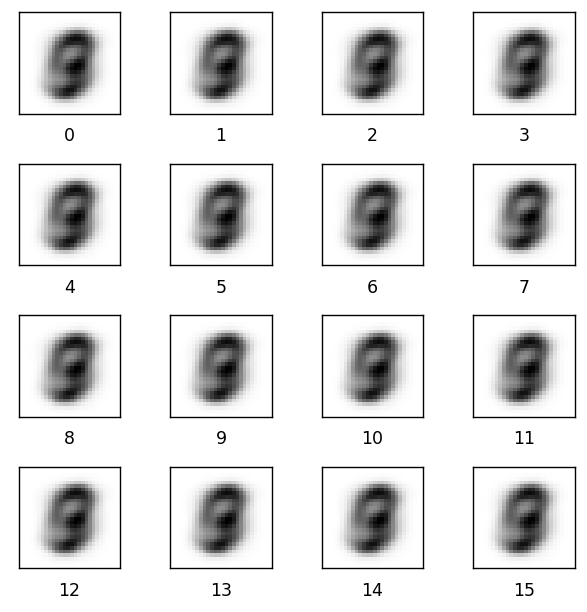

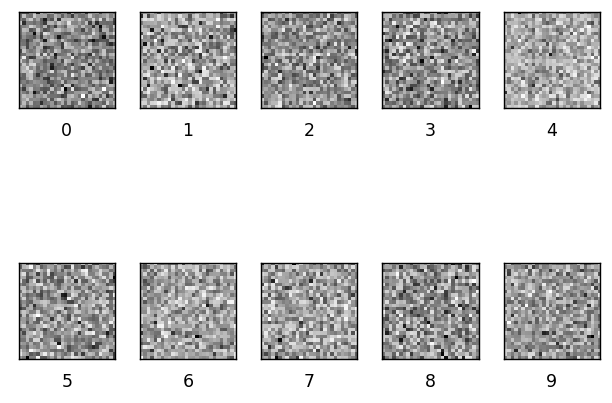

In [44]:
# Mid trained

model = rbm.GGRBM(n_x,10,0.0001,0.0001)
model.fit(x_train,0.0001,500)

pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(pred[ind].reshape(28,28), cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

# Not all patterns are learned

0 0.11248875929797995
1 0.11248877084645229
2 0.11248874720297916
3 0.11248878800845952
4 0.11248881486755126
5 0.11248877136628023
6 0.112488739735868
7 0.1124887590720571
8 0.11248878830984167
9 0.11248874271913446
10 0.11248877192455456
11 0.11248873759926437
12 0.11248875436618
13 0.11248874804471075
14 0.1124887479382319
15 0.11248875160175201
16 0.11248873636563346
17 0.11248874373773039
18 0.11248869894412908
19 0.11248880361843906
20 0.1124888049750285
21 0.11248879630895547
22 0.11248872406243246
23 0.11248879889560116
24 0.11248875170002988
25 0.11248874665282488
26 0.11248876241408161
27 0.11248873228814477
28 0.11248875457965919
29 0.11248874258022279
30 0.11248875761960439
31 0.11248877920906727
32 0.1124887818733342
33 0.11248878661800368
34 0.11248877953086724
35 0.11248874642196591
36 0.11248877532576221
37 0.11248876429160394
38 0.11248875715994575
39 0.11248876254873093
40 0.11248878528211699
41 0.11248880254926096
42 0.1124887570990786
43 0.11248878500672631
44 0.112

349 0.11248875640279161
350 0.11248874506289944
351 0.11248878150644398
352 0.11248873940307898
353 0.11248873225542529
354 0.11248876682369134
355 0.11248877843996176
356 0.11248876275394756
357 0.11248871288324021
358 0.11248871148439499
359 0.1124888083483488
360 0.11248877089197472
361 0.11248877371936986
362 0.1124887484578842
363 0.11248876572595853
364 0.11248872896582042
365 0.11248874658261743
366 0.11248874716599033
367 0.11248876111101387
368 0.11248872652720152
369 0.11248874808901581
370 0.11248875624722378
371 0.1124887370715038
372 0.11248885065831656
373 0.11248876643317134
374 0.11248877336516026
375 0.11248872729831211
376 0.11248875088639473
377 0.11248872099127645
378 0.11248880499644809
379 0.11248875818847127
380 0.1124887784546287
381 0.11248876450891027
382 0.11248875934201108
383 0.11248873774321165
384 0.11248875989761205
385 0.11248875570707827
386 0.11248871328204382
387 0.11248877908102962
388 0.11248878190880912
389 0.11248876093466115
390 0.11248879608023

693 0.11248873855885415
694 0.11248874923410877
695 0.11248879955107895
696 0.1124887630481994
697 0.11248876845832205
698 0.11248876059297432
699 0.11248879228064446
700 0.11248877076264481
701 0.11248879552840894
702 0.11248874551825086
703 0.11248878461321807
704 0.11248876333023325
705 0.11248876500438929
706 0.11248874980034126
707 0.1124887446275405
708 0.11248872988260321
709 0.11248875796567426
710 0.11248877385045108
711 0.11248876508600858
712 0.11248876640353965
713 0.11248879228730908
714 0.11248877716536129
715 0.11248872531610081
716 0.11248876013180348
717 0.11248875038878392
718 0.11248875794868396
719 0.11248877733859622
720 0.1124887017986737
721 0.11248876501597717
722 0.11248874238992443
723 0.11248878919627073
724 0.11248873648182614
725 0.11248873285638493
726 0.11248870503525657
727 0.11248876911704875
728 0.1124887355731121
729 0.11248876976667647
730 0.11248877559478644
731 0.11248875502509166
732 0.11248875422312955
733 0.11248876637181222
734 0.11248874293818

1036 0.11248874801700029
1037 0.11248877409155063
1038 0.11248879095074708
1039 0.11248875046714102
1040 0.11248875403970213
1041 0.11248874441365045
1042 0.1124887305346423
1043 0.11248878736005202
1044 0.11248874189474799
1045 0.11248877406808726
1046 0.11248876139655405
1047 0.11248881771788855
1048 0.11248877843336018
1049 0.11248876087161402
1050 0.11248877371213384
1051 0.11248879090140072
1052 0.11248874939318565
1053 0.11248882401503948
1054 0.11248877419233885
1055 0.11248869287289882
1056 0.11248875936401648
1057 0.11248879178785227
1058 0.11248877248901558
1059 0.11248878527825476
1060 0.11248878660977885
1061 0.11248875467520754
1062 0.11248874843065987
1063 0.11248873066830868
1064 0.11248871881186691
1065 0.11248876626798668
1066 0.11248873176307438
1067 0.11248879955358275
1068 0.11248871319615604
1069 0.11248875816930869
1070 0.11248873847711714
1071 0.1124887720954541
1072 0.11248872671908208
1073 0.11248873871583664
1074 0.11248875901167554
1075 0.1124887617969193
107

1366 0.11248876330667075
1367 0.11248875788991992
1368 0.1124887522903876
1369 0.1124887276274314
1370 0.1124887443433948
1371 0.11248878666616188
1372 0.11248878573607456
1373 0.11248874751236367
1374 0.1124887236264028
1375 0.11248875659786652
1376 0.11248879286556314
1377 0.11248881118551274
1378 0.11248875213709321
1379 0.11248879238952814
1380 0.11248876271894788
1381 0.11248879668142243
1382 0.11248877202688254
1383 0.11248877604325198
1384 0.1124887881140744
1385 0.11248873209231071
1386 0.11248873086144814
1387 0.11248876483018766
1388 0.11248873476057168
1389 0.1124887800221776
1390 0.11248873733174011
1391 0.11248879777224599
1392 0.11248880091387212
1393 0.11248875311162945
1394 0.1124888103459251
1395 0.11248876653386385
1396 0.11248876605669417
1397 0.11248877384954577
1398 0.1124887656421817
1399 0.11248876442003294
1400 0.11248874325500298
1401 0.11248875402383852
1402 0.11248875981009385
1403 0.11248875621875866
1404 0.11248873864267839
1405 0.11248875480879743
1406 0.1

1697 0.1124887510069222
1698 0.11248879343759356
1699 0.11248876542569236
1700 0.11248876268219385
1701 0.11248876668515745
1702 0.1124887398377551
1703 0.11248877619235727
1704 0.11248873484985629
1705 0.11248871993591782
1706 0.11248874535962448
1707 0.11248879517856658
1708 0.11248871448564868
1709 0.11248875939331883
1710 0.11248877347427524
1711 0.11248873898301555
1712 0.11248873511692083
1713 0.11248874588990966
1714 0.11248875118554766
1715 0.11248874926780247
1716 0.11248878940786715
1717 0.1124887879253711
1718 0.11248880026722216
1719 0.1124887795103801
1720 0.11248873719426941
1721 0.1124888082023044
1722 0.11248875606308695
1723 0.11248879002250609
1724 0.11248873791624768
1725 0.11248877350217103
1726 0.11248879770211731
1727 0.11248876936209558
1728 0.11248875521167971
1729 0.11248875449681162
1730 0.11248877835786253
1731 0.11248878821110062
1732 0.11248875163716475
1733 0.11248873672729849
1734 0.1124887647111545
1735 0.11248877056310345
1736 0.11248877842141711
1737 0

2027 0.11248878830117294
2028 0.11248874243042366
2029 0.11248876715189171
2030 0.11248878323891437
2031 0.11248878554343676
2032 0.11248873735627561
2033 0.11248871655584274
2034 0.11248877502158883
2035 0.1124888031674937
2036 0.11248876962190697
2037 0.11248875570652118
2038 0.11248875824023342
2039 0.1124887914247351
2040 0.11248874298985782
2041 0.1124888123288037
2042 0.112488826023048
2043 0.11248873893582098
2044 0.11248874564133098
2045 0.11248871658906796
2046 0.1124887502227625
2047 0.11248874503639844
2048 0.11248877752623448
2049 0.11248873922078954
2050 0.11248877113646522
2051 0.11248876517106517
2052 0.11248880919306314
2053 0.11248876464584769
2054 0.11248873844147193
2055 0.11248876098098674
2056 0.11248876137320572
2057 0.11248875241573783
2058 0.1124887588759161
2059 0.11248878207470264
2060 0.11248877927614116
2061 0.11248878668297932
2062 0.11248875278503258
2063 0.11248877087407597
2064 0.11248874003805114
2065 0.11248873668160486
2066 0.11248875130556499
2067 0.

2357 0.11248874894052965
2358 0.11248877684782378
2359 0.11248876823973411
2360 0.11248876452531353
2361 0.11248876973304016
2362 0.11248877202693615
2363 0.11248873305010657
2364 0.11248878851331066
2365 0.11248877585688793
2366 0.11248878956976555
2367 0.11248874690284463
2368 0.11248877294147279
2369 0.11248878700315136
2370 0.11248877318478816
2371 0.11248874887251192
2372 0.11248877869599029
2373 0.11248877255071103
2374 0.11248875610186683
2375 0.11248876946575796
2376 0.11248874899420205
2377 0.11248873070692561
2378 0.11248875873607299
2379 0.11248879583360892
2380 0.11248875710214597
2381 0.11248875523792028
2382 0.11248878521594108
2383 0.11248878534690797
2384 0.11248874527809241
2385 0.11248878791258231
2386 0.11248878017210948
2387 0.11248872220171485
2388 0.11248874851983576
2389 0.11248872196516195
2390 0.11248875794403458
2391 0.11248873284228451
2392 0.11248876518655063
2393 0.11248877676070171
2394 0.1124887901841803
2395 0.11248876324945688
2396 0.1124887659712759
23

2687 0.11248880133922919
2688 0.11248879738173459
2689 0.11248876463866493
2690 0.11248876580341377
2691 0.11248878462854132
2692 0.11248873689499901
2693 0.11248874708000457
2694 0.11248873244152846
2695 0.11248881082460352
2696 0.11248883364809557
2697 0.1124887922143928
2698 0.11248872900786468
2699 0.11248876094002122
2700 0.1124887870346699
2701 0.1124887666535929
2702 0.11248874195903613
2703 0.11248876485017678
2704 0.11248877867737882
2705 0.11248873086216914
2706 0.11248874435509386
2707 0.1124887621527425
2708 0.11248880388928229
2709 0.1124887742760562
2710 0.11248874997663635
2711 0.11248877473644661
2712 0.11248877349520409
2713 0.11248878226442782
2714 0.11248878281119125
2715 0.11248881401710258
2716 0.11248876252977838
2717 0.11248872317744024
2718 0.11248875238270391
2719 0.11248877608810018
2720 0.11248876493162159
2721 0.11248875904228632
2722 0.11248878023495672
2723 0.11248874362743132
2724 0.11248877525888168
2725 0.1124887857285645
2726 0.11248871882349151
2727 0

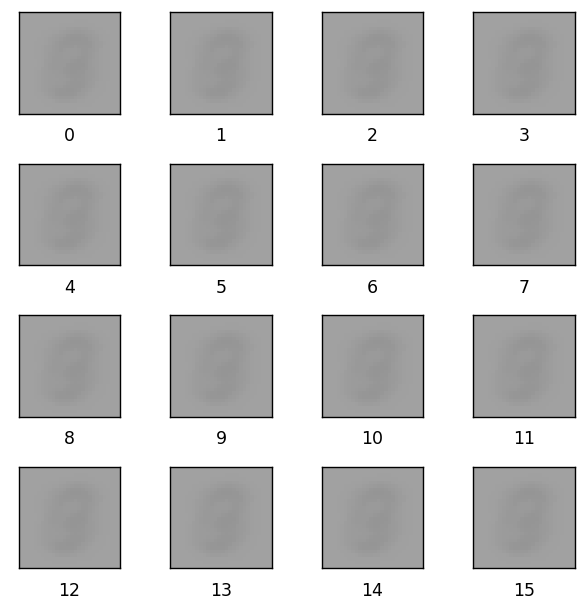

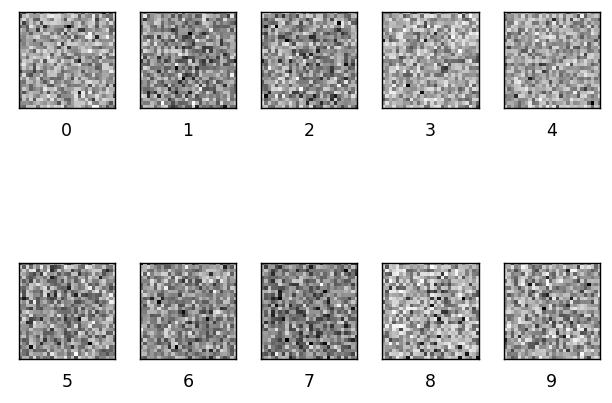

In [45]:
# Well trained

model = rbm.GGRBM(n_x,10,0.0001,0.0001)
model.fit(x_train,0.0001,3000)

pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(pred[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

In [46]:
model.w

array([[ 0.00252492, -0.00903444, -0.01516095, ...,  0.00521847,
        -0.00687391, -0.00622255],
       [ 0.01676636,  0.00260638, -0.02130005, ..., -0.00255519,
         0.00038743, -0.00931603],
       [-0.01047151, -0.01324348, -0.02643687, ..., -0.01142725,
        -0.01782981,  0.01513224],
       ...,
       [ 0.01519559, -0.00750698, -0.01310135, ..., -0.01283196,
         0.00672257, -0.00789204],
       [ 0.00207957,  0.00413228,  0.0023736 , ..., -0.00064102,
        -0.00419887, -0.01564277],
       [ 0.00821923,  0.00315359,  0.01148399, ..., -0.00651125,
         0.02519804, -0.00878269]])

In [47]:
np.sum(np.abs(model.w) > 1e-4)

7783

In [48]:
np.sum(np.abs(model.w) > 0)

7840